**Giovano Montemezzo Panatta**

**Séries Temporais - PETR3 e VALE3.**

In [1]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("AT_Ativos_PETR_VALE.csv")
data.head()

,Date,PETR3,VALE3
0,2017-01-02,16.530001,25.059999
1,2017-01-03,17.580000,26.170000
2,2017-01-04,17.370001,25.700001
3,2017-01-05,17.760000,26.680000
4,2017-01-06,17.490000,25.969999


In [3]:
#Visualizando distribuição
data.shape

(1712, 3)

In [ ]:
#Dados ausentes
data.isnull().sum()

Date     0
PETR3    0
VALE3    0
dtype: int64

**OBS:**: Podemos observar que o nosso DataFrame possui dados do tipo object e float. 1712 linhas, 3 colunas e não possui dados nulos/ausentes. É importante destacar que a coluna Date está no formato object. Como trabalharemos com Séries Temporais, abaixo alteraremos essa coluna para o tipo datetime.

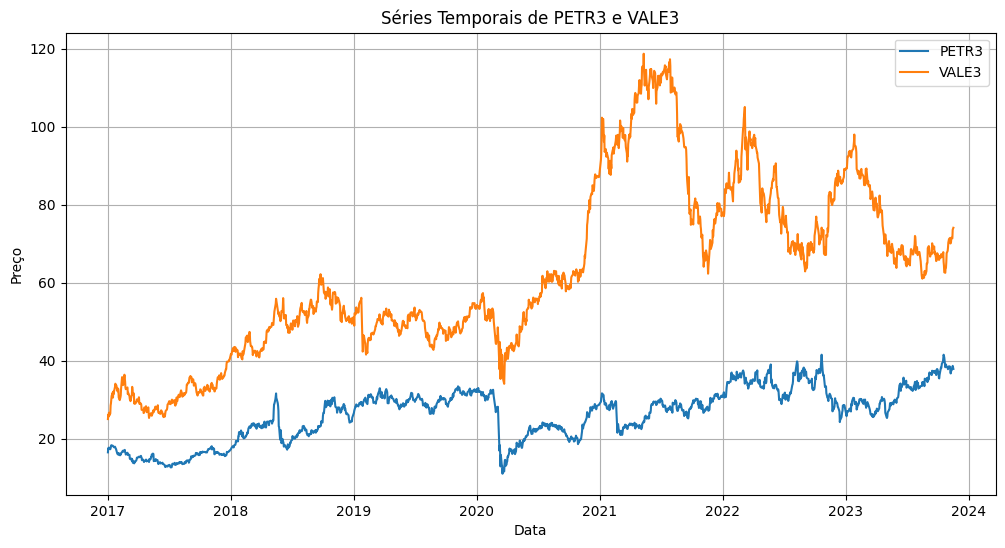

In [ ]:
#ALterando 'Date' para datetime
data["Date"] = pd.to_datetime(data["Date"])

plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['PETR3'], label='PETR3')
plt.plot(data['Date'], data['VALE3'], label = 'VALE3')

plt.title("Séries Temporais de PETR3 e VALE3")
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()

plt.grid(True)
plt.show()

**Visualização de dados com janelas móveis de PETR3 (Rolling Window) com a média dos dados: orginais, de 15, , 50 e 100 dias**

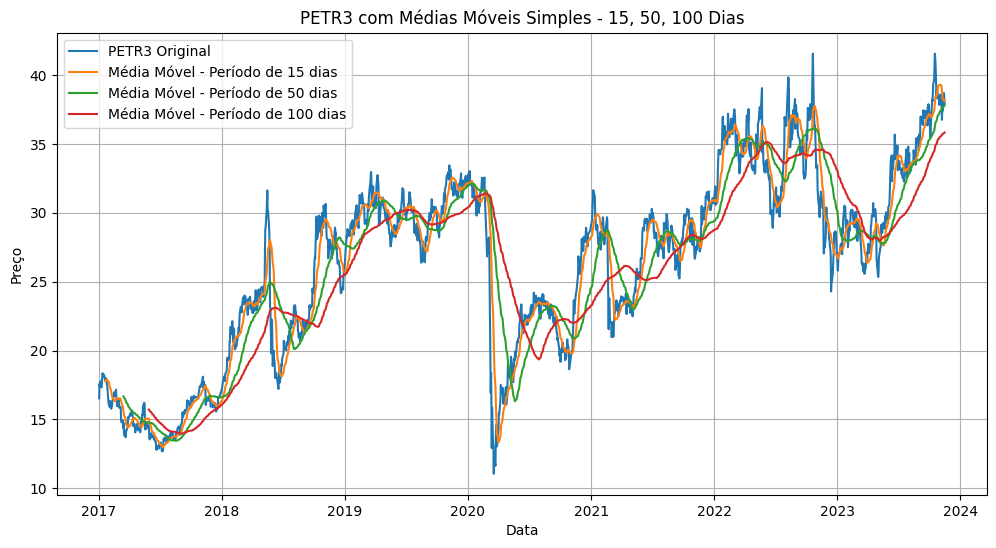

In [ ]:
data['mms_15'] = data['PETR3'].rolling(window=15). mean()
data['mms_50'] = data['PETR3'].rolling(window=50). mean()
data['mms_100'] = data['PETR3'].rolling(window=100). mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['PETR3'], label= 'PETR3 Original')
plt.plot(data['Date'], data['mms_15'], label= 'Média Móvel - Período de 15 dias')
plt.plot(data['Date'], data['mms_50'], label= 'Média Móvel - Período de 50 dias')
plt.plot(data['Date'], data['mms_100'], label= 'Média Móvel - Período de 100 dias')

plt.title('PETR3 com Médias Móveis Simples - 15, 50, 100 Dias')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()


plt.grid(True)
plt.show()


**Nova visualização única a série original de dados do ativo VALE3, juntamente com a visualização da aplicação de média móvel exponencial com janela de 200 dias**

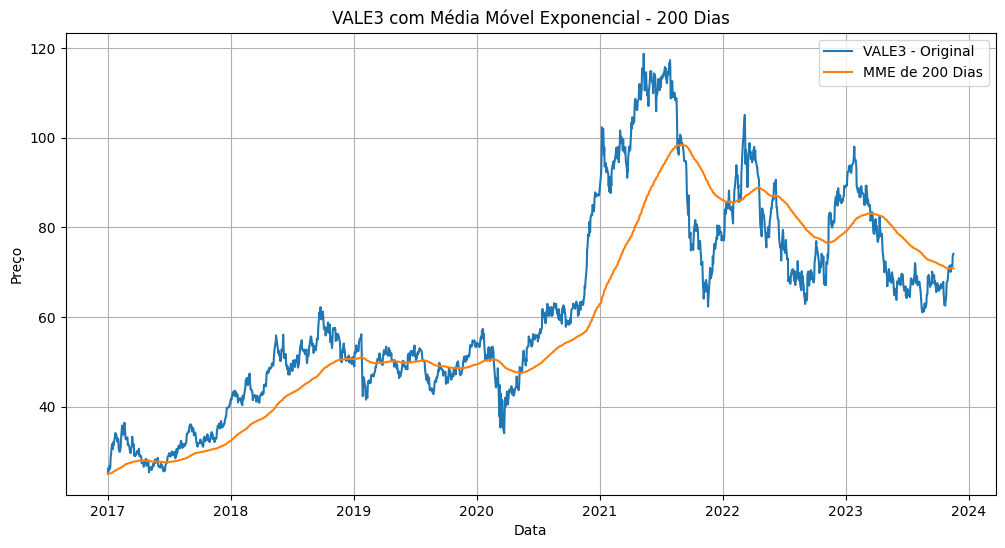

In [ ]:
# Calculando a média móvel exponencial  
data['mme_200'] = data['VALE3'].ewm(span=200, adjust=False).mean()


plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['VALE3'], label='VALE3 - Original')
plt.plot(data['Date'], data['mme_200'], label='MME de 200 Dias')


plt.title('VALE3 com Média Móvel Exponencial - 200 Dias')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()


plt.grid(True)
plt.show()


**Conclusões**: Observando o gráfico, a média móvel exponencial de 200 dias está declinando e os preços recentes estão abaixo dela, indicando uma tendência de queda para as ações da VALE3.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3d3c0dd4-052c-42ce-9a94-8346bfdd8b1c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>